In [1]:
# -*- coding:UTF-8 -*- ＃
# 导入模块
import sys
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image 
from sklearn.datasets import load_iris
from sklearn import tree

from matplotlib.colors import ListedColormap
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

sys.path.append(r"C:\Users\zhang\Desktop\exeserise")
import mymodule as MYD

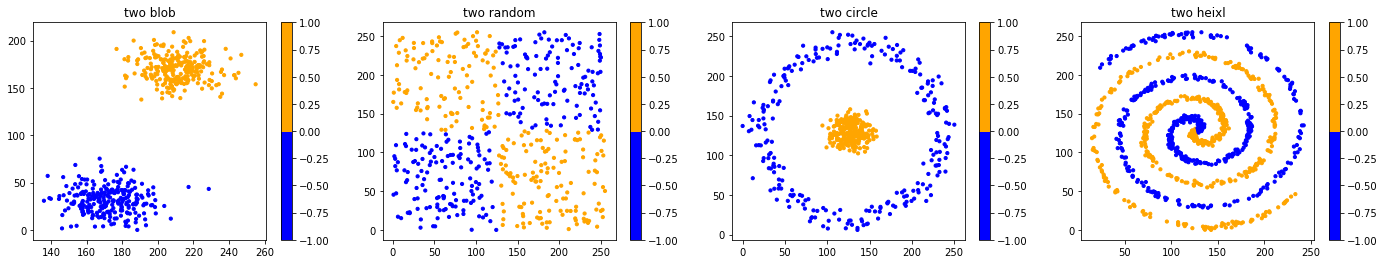

In [2]:
n_samples=500
XB,yb=MYD.makeblods(n_samples)
XR,yr=MYD.makerandoms(n_samples)
XC,yc=MYD.makecircles(n_samples)
XH,yh=MYD.makeHelixs(n_samples)
XAS = [XB, XR, XC,XH]
YAS=[yb,yr,yc,yh]

cor = ListedColormap(['Blue', 'Orange'])
titlename=['two blob','two random','two circle','two heixl']
cmap=[cor,cor,cor,cor]
MYD.DrawManyChart(XAS,YAS,cmap,24,4,titlename,10,1,4)

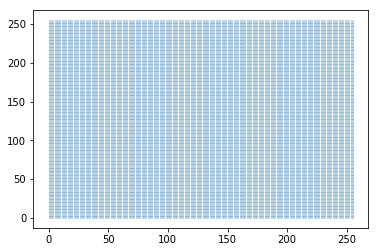

In [3]:
Xzip,points=MYD.makeGrids()
plt.figure()
plt.scatter(points[:,0],points[:,1],s=0.009)
plt.show(); points[:,0].shape;

# 随机森林、ExtraTrees、Adaboost、GradientBoost分类效果

[[1.0], [1.0], [1.0], [1.0], [1.0]]


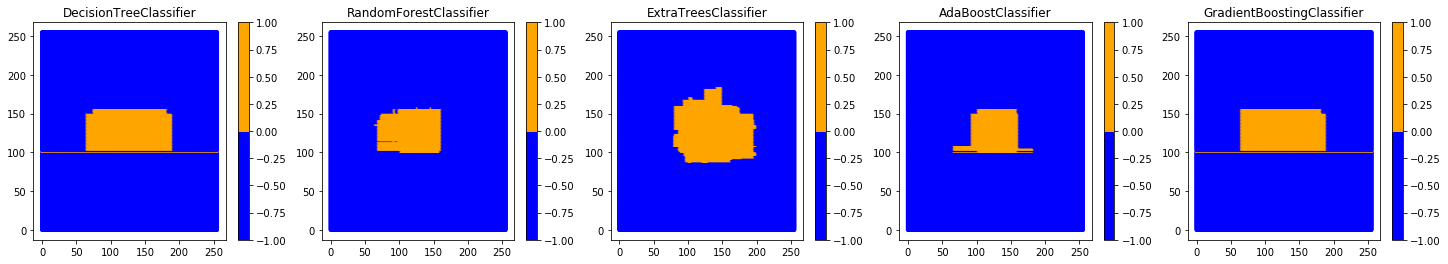

In [4]:
LabelDTR=[]; LabelRAN=[];  LabelEXT=[]; LabelADA=[]; LabelGRA=[]; 
lable=[LabelDTR,LabelRAN,LabelEXT,LabelADA,LabelGRA]; 
ScoreDTR=[];  ScoreRAN=[];  ScoreEXT=[];  ScoreADA=[];  ScoreGRA=[];
score=[ScoreDTR,ScoreRAN,ScoreEXT,ScoreADA,ScoreGRA];

L=len(points);   a=1
number_of_points = int(a*L)
p = points[0:number_of_points]

dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)

modelDTR=DecisionTreeClassifier(criterion='gini',max_depth=5)
modelRandomForest=RandomForestClassifier(n_estimators=7, criterion='gini', max_depth=None)
modelExtraTree=ExtraTreesClassifier()
modelAdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',max_depth=3), n_estimators=5,learning_rate=1.0,algorithm='SAMME')
modelGradient=GradientBoostingClassifier(n_estimators=5,learning_rate=1.0,max_depth=4, random_state=0)

allmodule=[modelDTR,modelRandomForest,modelExtraTree,modelAdaBoost,modelGradient]
DI=2
for i in range(0,len(allmodule)):
    tempmodule=None
    tempmodule=allmodule[i].fit(XAS[DI],YAS[DI])
    lable[i].append(tempmodule.predict(p))
    score[i].append(tempmodule.score(XAS[DI],YAS[DI]))

print(score);
cor = ListedColormap(['Blue', 'Orange'])
titlename=['DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','AdaBoostClassifier','GradientBoostingClassifier']
PC=[p,p,p,p,p]
cmap=[cor,cor,cor,cor,cor]
MYD.DrawManyChart(PC,lable,cmap,25,4,titlename,10,1,5)


# RandomForest并行分类过程

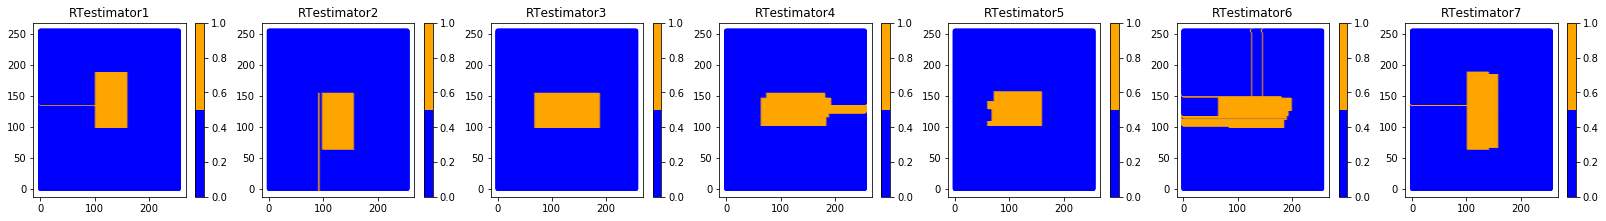

In [5]:
Nestimators=modelRandomForest.estimators_
Nclasses=modelRandomForest.n_classes_
oobdecisionfunction=modelRandomForest.oob_score
indicator,n_nodes_ptr=modelRandomForest.decision_path(XAS[DI])

labelEST1=[];  labelEST2=[];  labelEST3=[];  labelEST4=[];  labelEST5=[];  labelEST6=[];   labelEST7=[];
alllabelEST=[labelEST1,labelEST2,labelEST3,labelEST4,labelEST5,labelEST6,labelEST7];

for k in range(0,len(Nestimators)):
    Estimator=Nestimators[k]
    alllabelEST[k].append(Estimator.predict(p))
    
cor = ListedColormap(['Blue', 'Orange'])
titlename=['RTestimator1','RTestimator2','RTestimator3','RTestimator4','RTestimator5','RTestimator6','RTestimator7'];

PCE=[p,p,p,p,p,p,p]
cmap=[cor,cor,cor,cor,cor,cor,cor]
MYD.DrawManyChart(PCE,alllabelEST,cmap,28,3.2,titlename,10,1,7)

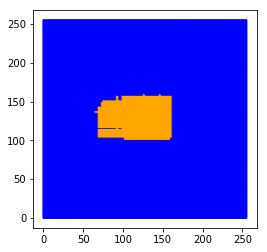

In [6]:
sumlabel=labelEST1;
for n in range(1,len(alllabelEST)):
    for m in range(0,len(labelEST1)):
        sumlabel[m]=sumlabel[m]+alllabelEST[n][m]

finallabel=[]; 
for j in range(0,len(sumlabel[0])):
    if(sumlabel[0][j]>=4):
        finallabel.append(1)
    else:
        finallabel.append(0)

plt.figure(figsize=(4,4))
plt.scatter(p[:,0],p[:,1],c=finallabel,s=0.9,cmap=cor)
plt.show();

# AdaBoost串行分类过程

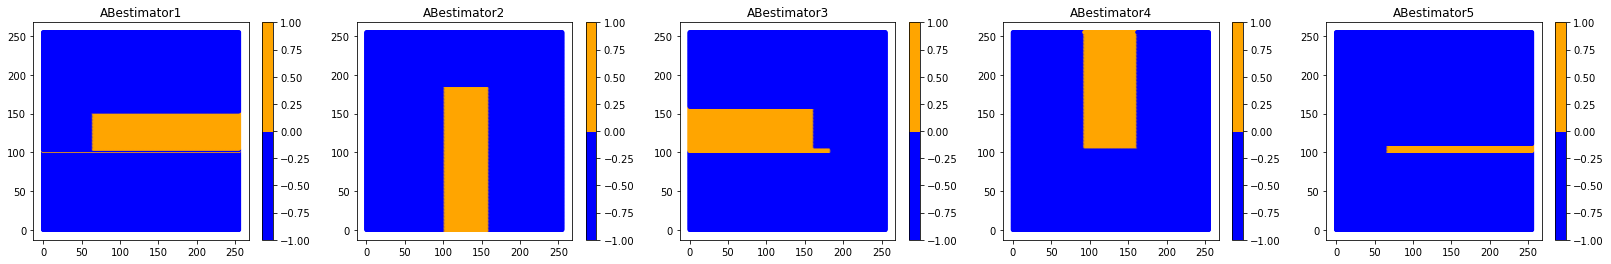

In [7]:
ABestimator=modelAdaBoost.estimators_
ABweight=modelAdaBoost.estimator_weights_
ABerror=modelAdaBoost.estimator_errors_

labelAB1=[];  labelAB2=[];  labelAB3=[];  labelAB4=[];  labelAB5=[]; 
alllabelAB=[labelAB1,labelAB2,labelAB3,labelAB4,labelAB5];

for WI in range(0,len(ABestimator)):
    estimator=ABestimator[WI]
    mylabel=estimator.predict(p)
    templableTram=MYD.classtransform(mylabel)
    alllabelAB[WI].append(templableTram)

cor = ListedColormap(['Blue', 'Orange'])
titlename=['ABestimator1','ABestimator2','ABestimator3','ABestimator4','ABestimator5'];

PCEAB=[p,p,p,p,p]
cmap=[cor,cor,cor,cor,cor]
MYD.DrawManyChart(PCEAB,alllabelAB,cmap,28,4,titlename,10,1,5)
    

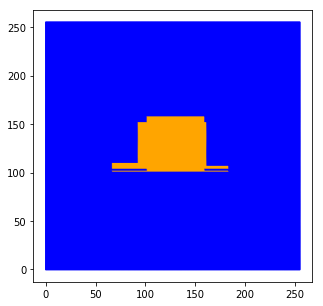

In [8]:
sumlabelAB=MYD.Multiplyonedata(alllabelAB[0],ABweight[0]);

for WI in range(1,len(alllabelAB)):
    sumlabelAB=MYD.addarray(sumlabelAB,MYD.Multiplyonedata(alllabelAB[WI],ABweight[WI]))

finallabelAB=[]; 
for j in range(0,len(sumlabelAB[0])):
    if(sumlabelAB[0][j]>0):
        finallabelAB.append(1)
    else:
        finallabelAB.append(-1)

plt.figure(figsize=(5,5))
plt.scatter(p[:,0],p[:,1],c=finallabelAB,s=0.9,cmap=cor)
plt.show();